<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [28]:
import numpy as np

def sum_prod(X, V):
    return np.sum([X[i].dot(V[i]) for i in range(len(X))], axis=0)

def test_sum_prod():
    test_cases = [
        (
            [  
                np.matrix([[1, 2], [3, 4]]),
                np.matrix([[5, 6], [7, 8]])
            ],
            [  
                np.array([1, 1]),
                np.array([2, 2])
            ],
            np.array([25, 37])
        ),
        (
            [  
                np.matrix([[-1, -2, -3], [-4, -5, -6], [-7, -8, -9]]),
                np.matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
            ],
            [  
                np.array([1, 0, -1]),
                np.array([1, 1, 1])
            ],
            np.array([8, 17, 26]) 
        ),
    ]

    for matrix, vectors, expected in test_cases:
        result = sum_prod(matrix, vectors)
        print(f"Matrix:\n{np.array(matrix)}\nVectors:\n{np.array(vectors)}")
        assert np.allclose(result, expected), \
            f"Test failed: expected {expected}, got {result}"
        print(f"Test passed: expected {expected}, got {result}\n")

    print("All tests completed.")

test_sum_prod()


Matrix:
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
Vectors:
[[1 1]
 [2 2]]
Test passed: expected [25 37], got [[25 37]]

Matrix:
[[[-1 -2 -3]
  [-4 -5 -6]
  [-7 -8 -9]]

 [[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]]]
Vectors:
[[ 1  0 -1]
 [ 1  1  1]]
Test passed: expected [ 8 17 26], got [[ 8 17 26]]

All tests completed.


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [36]:
import numpy as np

def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)

def test_binarize():
    matrix = np.matrix([[-2,-1,0], [1,2,3], [4,5,6]])
    test_cases = [
        (0, np.matrix([[0, 0, 0], [1, 1, 1], [1, 1, 1]])),
        (-1, np.matrix([[0, 0, 1], [1, 1, 1], [1, 1, 1]])), 
        (2, np.matrix([[0, 0, 0], [0, 0, 1], [1, 1, 1]]))  
    ]
    
    print("For test matrix:")
    print(matrix)
    for threshold, expected in test_cases:
        result = binarize(matrix, threshold)
        assert np.allclose(result, expected), \
            f"Test failed for threshold = {threshold}: expected \n{np.array(expected)}, \nresult \n{np.array(result)}"
        print(f"Test passed for threshold = {threshold}: expected \n{np.array(expected)}, \nresult\n{np.array(result)}")
    print("All tests completed.")

test_binarize()

For test matrix:
[[-2 -1  0]
 [ 1  2  3]
 [ 4  5  6]]
Test passed for threshold = 0: expected 
[[0 0 0]
 [1 1 1]
 [1 1 1]], 
result
[[0 0 0]
 [1 1 1]
 [1 1 1]]
Test passed for threshold = -1: expected 
[[0 0 1]
 [1 1 1]
 [1 1 1]], 
result
[[0 0 1]
 [1 1 1]
 [1 1 1]]
Test passed for threshold = 2: expected 
[[0 0 0]
 [0 0 1]
 [1 1 1]], 
result
[[0 0 0]
 [0 0 1]
 [1 1 1]]
All tests completed.


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [67]:
import numpy as np

def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(mat[:, i]) for i in range(mat.shape[1])]

def tests_unique_rows_columns():
    test_cases = [
        (
            np.array([[1, 2, 2], [3, 4, 4], [5, 1, 1]]), 
            [np.array([1, 2]), np.array([3, 4]), np.array([1, 5])],  
            [np.array([1, 3, 5]), np.array([1, 2, 4]), np.array([1, 2, 4])]   
        ),
        (
            np.array([[1, 2, 3], [3, 2, 1], [1, 1, 1]]),
            [np.array([1, 2, 3]), np.array([1, 2, 3]), np.array([1])],       
            [np.array([1, 3]), np.array([1, 2]), np.array([1, 3])]                     
        )
    ]  
    
    for i, (matrix, expected_row, expected_column) in enumerate(test_cases):
        result_row = unique_rows(matrix)
        result_column = unique_columns(matrix)

        print("For matrix:")
        print(matrix)

        for expected, result in zip(expected_row, result_row):
            assert np.array_equal(expected, result), f"Test row {i+1} failed: expected {expected}, result {result}"
            print(f"Test row {i+1} passed: expected {expected}, result {result}")

        for expected, result in zip(expected_column, result_column):
            assert np.array_equal(expected, result), f"Test column {i+1} failed: expected {expected}, result {result}"
            print(f"Test column {i+1} passed: expected {expected}, result {result}")
    
    print("All tests completed.")

tests_unique_rows_columns()


For matrix:
[[1 2 2]
 [3 4 4]
 [5 1 1]]
Test row 1 passed: expected [1 2], result [1 2]
Test row 1 passed: expected [3 4], result [3 4]
Test row 1 passed: expected [1 5], result [1 5]
Test column 1 passed: expected [1 3 5], result [1 3 5]
Test column 1 passed: expected [1 2 4], result [1 2 4]
Test column 1 passed: expected [1 2 4], result [1 2 4]
For matrix:
[[1 2 3]
 [3 2 1]
 [1 1 1]]
Test row 2 passed: expected [1 2 3], result [1 2 3]
Test row 2 passed: expected [1 2 3], result [1 2 3]
Test row 2 passed: expected [1], result [1]
Test column 2 passed: expected [1 3], result [1 3]
Test column 2 passed: expected [1 2], result [1 2]
Test column 2 passed: expected [1 3], result [1 3]
All tests completed.


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Matrix:
[[ 6.81700489  7.44298878  4.82138811 10.26091904  6.74658896  4.95497018
   4.97555309  5.41193194  6.74951808]
 [ 2.07749735  7.91707532  3.57868971  1.18339672  4.06458436  8.16246157
   7.94143428  5.97471419  6.19468349]
 [ 5.92448878  5.89460818  0.08902321  4.2312544   7.48507436  5.89772242
   2.91634185  2.33175334  1.7898684 ]]

Mean (rows): [6.46454034 5.23272633 4.06223722]
Mean (columns): [4.93966367 7.08489076 2.82970034 5.22519005 6.09874923 6.33838472
 5.27777641 4.57279983 4.91135666]

Variance (rows): [2.66207404 6.11722415 5.24407681]
Variance (columns): [ 4.22876219  0.74584598  4.0130388  14.22752261  2.15980679  1.81175847
  4.2542618   2.56393198  4.92315138]


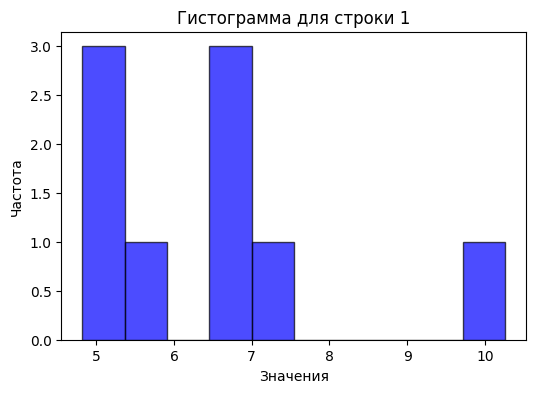

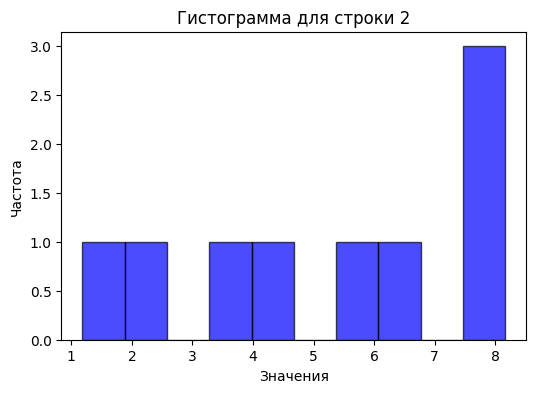

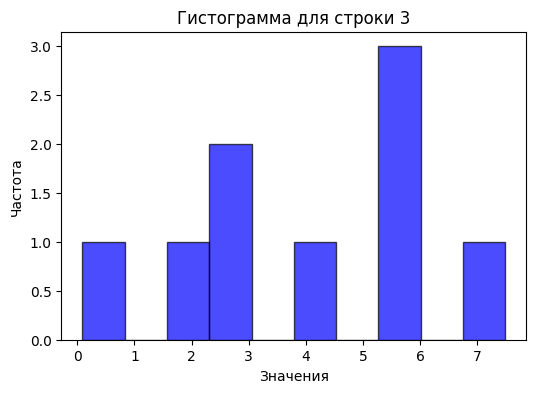

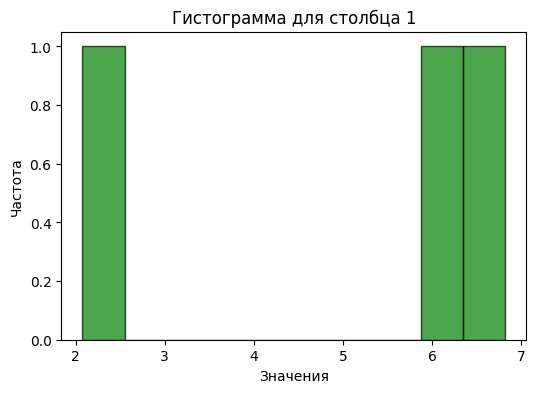

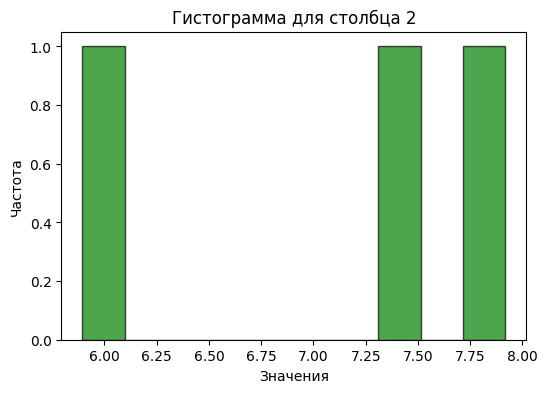

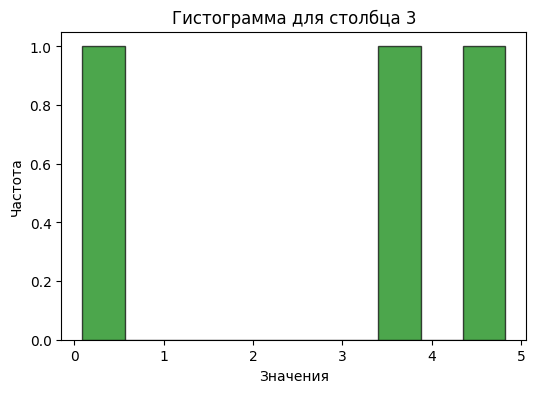

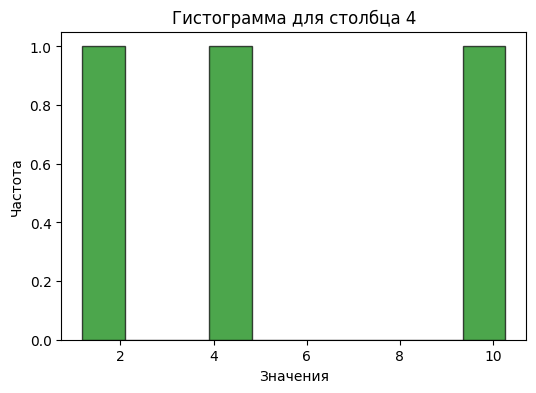

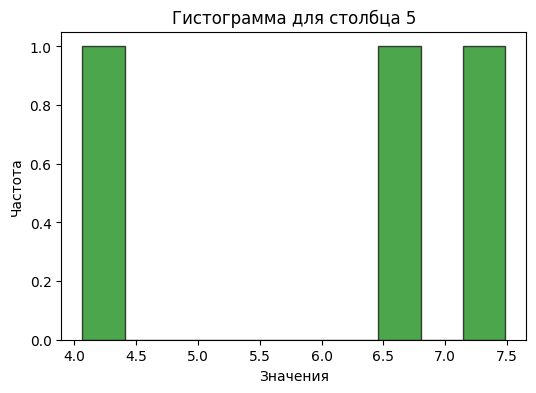

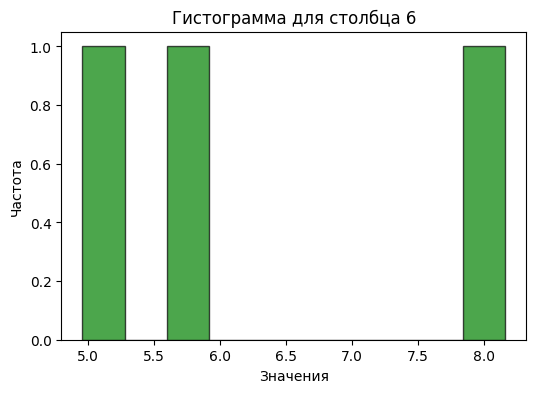

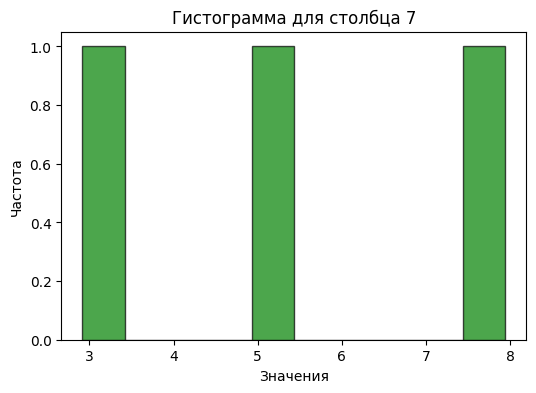

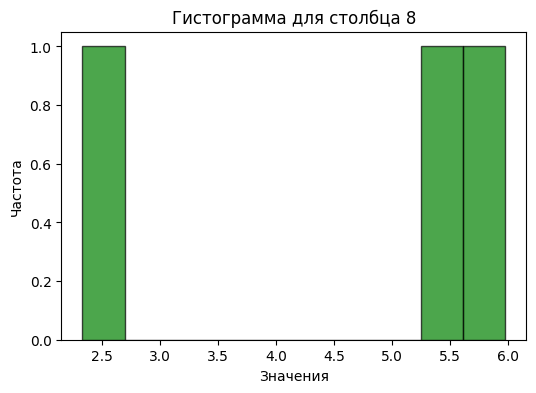

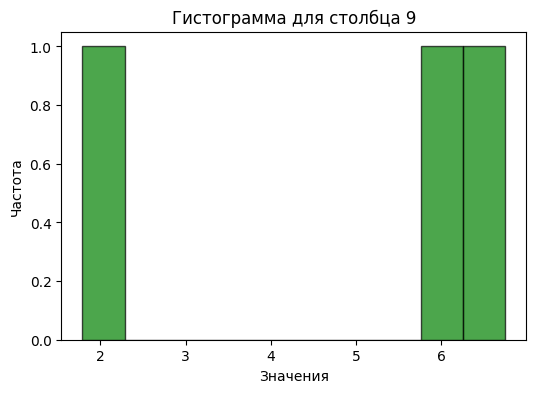

In [78]:
import numpy as np
import matplotlib.pyplot as plt

def matrix_and_analyze(m, n, mean, std_dev):
    matrix = np.random.normal(mean, std_dev, (m, n))
    
    dispersion_row = np.var(matrix, axis=1)
    dispersion_column = np.var(matrix, axis=0)
    
    means_row = np.mean(matrix, axis=1)
    means_column = np.mean(matrix, axis=0)
    
    print("Matrix:")
    print(matrix)
    print("\nMean (rows):", means_row)
    print("Mean (columns):", means_column)
    print("\nVariance (rows):", dispersion_row)
    print("Variance (columns):", dispersion_column)
    
    for i in range(m):
        plt.figure(figsize=(6, 4))
        plt.hist(matrix[i, :], bins=10, alpha=0.7, color='blue', edgecolor='black')
        plt.title(f'Гистограмма для строки {i+1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.show()

    for j in range(n):
        plt.figure(figsize=(6, 4))
        plt.hist(matrix[:, j], bins=10, alpha=0.7, color='green', edgecolor='black')
        plt.title(f'Гистограмма для столбца {j+1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.show()

matrix_and_analyze(3, 9, 5, 3)


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [73]:
def chess(m, n, a, b):
    base = np.array([[a, b], [b, a]])
    return np.tile(base, (m // 2 + 1, n // 2 + 1))[:m, :n]

def tests_chess():
    test_cases = [
        (
            4, 6, 1, 0, 
            np.array([[1, 0, 1, 0, 1, 0],
                      [0, 1, 0, 1, 0, 1],
                      [1, 0, 1, 0, 1, 0],
                      [0, 1, 0, 1, 0, 1]])  
        ),
        (
            3, 4, -1, -2, 
            np.array([[-1, -2, -1, -2],
                      [-2, -1, -2, -1],
                      [-1, -2, -1, -2]])  
        ),
    ]

    for i, (rows, cols, a, b, expected) in enumerate(test_cases):
        result = chess(rows, cols, a, b)

        assert np.array_equal(result, expected), f"Test {i + 1} failed: expected \n{expected}, \nresult \n{result}"
        print(f"Test {i + 1} passed: expected \n{expected}, \nresult \n{result}")

    print("All tests completed.")

tests_chess()



Test 1 passed: expected 
[[1 0 1 0 1 0]
 [0 1 0 1 0 1]
 [1 0 1 0 1 0]
 [0 1 0 1 0 1]], 
result 
[[1 0 1 0 1 0]
 [0 1 0 1 0 1]
 [1 0 1 0 1 0]
 [0 1 0 1 0 1]]
Test 2 passed: expected 
[[-1 -2 -1 -2]
 [-2 -1 -2 -1]
 [-1 -2 -1 -2]], 
result 
[[-1 -2 -1 -2]
 [-2 -1 -2 -1]
 [-1 -2 -1 -2]]
All tests completed.


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

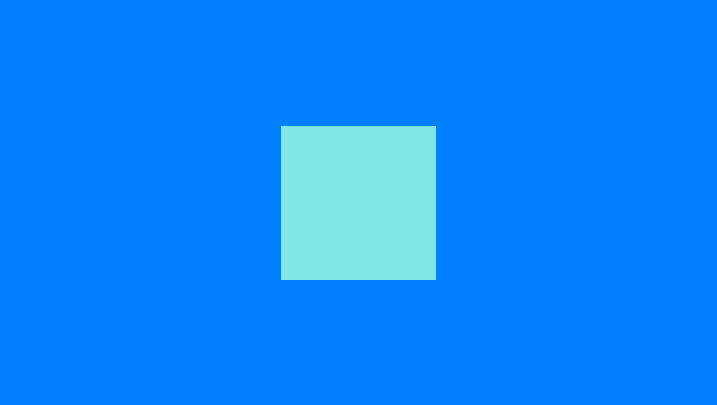

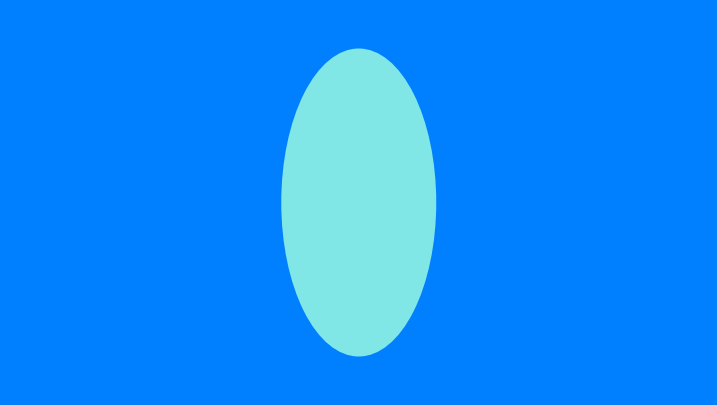

In [197]:
import matplotlib.patches as patches

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    fig, ax = plt.subplots(figsize=(m, n))
    ax.set_xlim(0, m)
    ax.set_ylim(0, n)
    fig.patch.set_facecolor(background_color)

    rect = patches.Rectangle(
        ((m - a) / 2, (n - b) / 2),
        width=a,
        height=b,
        facecolor=rectangle_color
    )

    ax.add_patch(rect)
    plt.axis('off')
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    fig, ax = plt.subplots(figsize=(m, n))
    ax.set_xlim(0, m)
    ax.set_ylim(0, n)
    fig.patch.set_facecolor(background_color)

    rect = patches.Ellipse(
        (m / 2, n / 2),
        width=a,
        height=b,
        facecolor=ellipse_color
    )

    ax.add_patch(rect)
    plt.axis('off')
    plt.show()

draw_rectangle(2, 2, 9, 5, (0.5, 0.9, 0.9),(0, 0.5, 1))
draw_ellipse(2, 4, 9, 5, (0.5, 0.9, 0.9),(0, 0.5, 1))

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [221]:
import numpy as np

def analyze(arr, p):
    dispersion = np.var(arr)
    mean = np.mean(arr)
    sko = np.sqrt(dispersion)
    loc_max = local_max(arr)
    loc_min = local_min(arr)
    moving_average = np.convolve(arr, np.ones(p), mode='valid') / p  
    return dispersion, mean, sko, loc_max, loc_min, moving_average

def local_max(arr):
    res = []
    for i in range(1, len(arr) - 1):
        if arr[i] > arr[i - 1] and arr[i] > arr[i + 1]:
            res.append(arr[i]) 
    return np.array(res)

def local_min(arr):
    res = []
    for i in range(1, len(arr) - 1):
        if arr[i] < arr[i - 1] and arr[i] < arr[i + 1]:
            res.append(arr[i]) 
    return np.array(res)

def test_analyze():
    data = np.array([1, 3, 2, 5, 4, 6, 4, 3, 5, 7, 8, 6, 5])
    p = 3
    
    expected_mean = np.mean(data)
    expected_variance = np.var(data)
    expected_std_dev = np.sqrt(expected_variance)
    expected_local_maxima = np.array([3, 5, 6, 8]) 
    expected_local_minima = np.array([2, 4, 3])  
    expected_moving_average = np.array([2.0,3.33,3.67,5.0,4.67,4.33,4.0,5.0,6.67,7.0,6.33]) 
    
    dispersion, mean, sko, loc_max, loc_min, moving_average = analyze(data, p)

    assert np.isclose(mean, expected_mean), f"Mean calculation is incorrect.  Expected: {expected_mean}, result: {mean}"
    assert np.isclose(dispersion, expected_variance), f"Variance calculation is incorrect. Expected: {expected_variance}, result: {dispersion}"
    assert np.isclose(sko, expected_std_dev), f"Standard deviation calculation is incorrect. Expected: {expected_std_dev}, result: {sko}"
    assert np.array_equal(loc_max, expected_local_maxima), f"Local maxima calculation is incorrect. Expected: {expected_local_maxima}, result: {loc_max}"
    assert np.array_equal(loc_min, expected_local_minima), f"Local minima calculation is incorrect. Expected: {expected_local_minima}, result: {loc_min}"
    moving_average_rounded = np.round(moving_average, 2)
    expected_moving_average_rounded = np.round(expected_moving_average, 2)
    assert np.array_equal(moving_average_rounded, expected_moving_average_rounded), f"Moving average calculation is incorrect. Expected: {expected_moving_average_rounded}, result: {moving_average_rounded}"

    print("All tests passed!")

# Запуск тестов
test_analyze()


All tests passed!


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [239]:
def one_hot_encoding(arr):
    res = np.zeros((len(arr), arr.shape[0]))
    for i, value in enumerate(arr):
        res[i, value] = 1
    return res

def test_one_hot_encoding():
    data = np.array([0, 2, 3, 0])
    expected_output = np.array([[1, 0, 0, 0],
                                 [0, 0, 1, 0],
                                 [0, 0, 0, 1],
                                 [1, 0, 0, 0]])
    
    result = one_hot_encoding(data)
    assert np.array_equal(result, expected_output), f"Test failed: expected {expected_output}, got {result}"
    
    print("Test passed!")

test_one_hot_encoding()



Test passed!
